In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
"""##LBG----- REading Doc's centroids
f=open('vq_images_sonar_32.dat')
contents=f.readlines()
cc_lgbt=[]
for char in contents:
    words=char.split()
    cc_lgbt.append(words[2:-1])
cc_buzo=[]
for i in range(32):
    cc_buzo.append(np.asarray(cc_lgbt[i], dtype=float ))
cc_buzo=np.asarray(cc_buzo)
"""

"##LBG----- REading Doc's centroids\nf=open('vq_images_sonar_32.dat')\ncontents=f.readlines()\ncc_lgbt=[]\nfor char in contents:\n    words=char.split()\n    cc_lgbt.append(words[2:-1])\ncc_buzo=[]\nfor i in range(32):\n    cc_buzo.append(np.asarray(cc_lgbt[i], dtype=float ))\ncc_buzo=np.asarray(cc_buzo)\n"

In [5]:
data=pd.read_csv('RealROBOT/lecturasconodometria-10laps.txt')
#data=pd.read_csv('RealROBOT/lecturasconodometria_just_odom3.txt')
#data=data.iloc[:40,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####CLIPPING VALUES
clip1=3
clip2=1

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs.values,0,clip1)
lecs2=np.clip(lecs,0,clip2)
data.iloc[:,0:n_reads]=lecs
lecs=pd.DataFrame(data.iloc[:,0:n_reads])
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R956,R957,R958,R959,R960,R961,R962,x,y,theta
count,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.00000,19433.000000,...,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000,19433.000000
mean,2.260264,2.252524,2.244382,2.236337,2.231725,2.223641,2.226845,2.229801,2.22718,2.226435,...,1.928450,1.922802,1.924650,1.924829,1.926358,1.931596,1.939468,1.248866,-0.319272,0.230448
std,1.735076,1.721681,1.702591,1.689344,1.676797,1.657571,1.644496,1.631825,1.60929,1.595421,...,0.969638,0.979696,0.984196,0.988227,0.991369,0.992650,0.988197,0.590411,0.365307,2.014299
min,0.147000,0.280000,0.113000,0.223000,0.128000,0.137000,0.198000,0.218000,0.24700,0.329000,...,0.306000,0.320000,0.257000,0.211000,0.246000,0.264000,0.256000,0.435023,-0.824538,-3.140386
25%,0.619000,0.617000,0.615000,0.614000,0.616000,0.622000,0.632000,0.644000,0.65900,0.671000,...,0.746000,0.700000,0.674000,0.658000,0.648000,0.646000,0.656000,0.679604,-0.663385,-1.298529
50%,2.195000,2.192000,2.189000,2.185000,2.181000,2.178000,2.175000,2.172000,2.16900,2.166000,...,1.903000,1.909000,1.913000,1.916000,1.919000,1.922000,1.928000,1.204543,-0.360694,-0.474492
75%,3.233000,3.216000,3.204000,3.176000,3.150000,3.126000,3.104000,3.083000,3.06000,3.040000,...,2.658000,2.657000,2.657000,2.661000,2.657000,2.660000,2.662000,1.893712,0.029893,2.547255
max,9.868000,9.863000,9.863000,9.869000,9.856000,9.848000,9.850000,9.852000,9.85600,9.853000,...,4.430000,4.432000,4.433000,4.418000,5.045000,5.045000,5.044000,2.012688,0.272840,3.141398


In [6]:
"""##FORMAT FOR DOCS LBG
doc_for_doc=False
if doc_for_doc:

    start='( '
    end= ')'
    with  open('real_odom_hokuyo_run.txt' , 'a') as out:
        for i in range(2):#len(lecs)):
            reng=lecs.iloc[i,:].values
            strread=start
            for read in reng:
                strread= strread + str(read) + ' '

            out.write (strread+ end +'\n')

            
 
    """

"##FORMAT FOR DOCS LBG\ndoc_for_doc=False\nif doc_for_doc:\n\n    start='( '\n    end= ')'\n    with  open('real_odom_hokuyo_run.txt' , 'a') as out:\n        for i in range(2):#len(lecs)):\n            reng=lecs.iloc[i,:].values\n            strread=start\n            for read in reng:\n                strread= strread + str(read) + ' '\n\n            out.write (strread+ end +'\n')\n\n            \n \n    "

In [7]:
if True:
    
    K_corpus=32
    N=8
    
    #kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
     #                 n_init=10, max_no_improvement=10, verbose=0)
    
    
    
    #KMEANS LECS HOKUYO#########################################################
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                     n_init=10, max_no_improvement=10, verbose=0)
    
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    ###########################################################################3
    
    #KMEANS LECS HOKUYO#########################################################
    kmedias2=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                     n_init=10, max_no_improvement=10, verbose=0)
    
    kmedias2.fit(lecs2)
    ccvk_2=kmedias2.cluster_centers_
    ###########################################################################3
    
    
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
aus=[]
auvks=[]
auvks_2=[]





for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , ccxyth)
    
    aus.append(au)
    

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
    auvk_2= np.power(lec.T-ccvk_2,2).sum(axis=1,keepdims=True).argmin()
    auvks.append(auvk)
    auvks_2.append(auvk_2)


data['Y']=aus
data['Vk']=auvks
data['Vk_2']=auvks_2



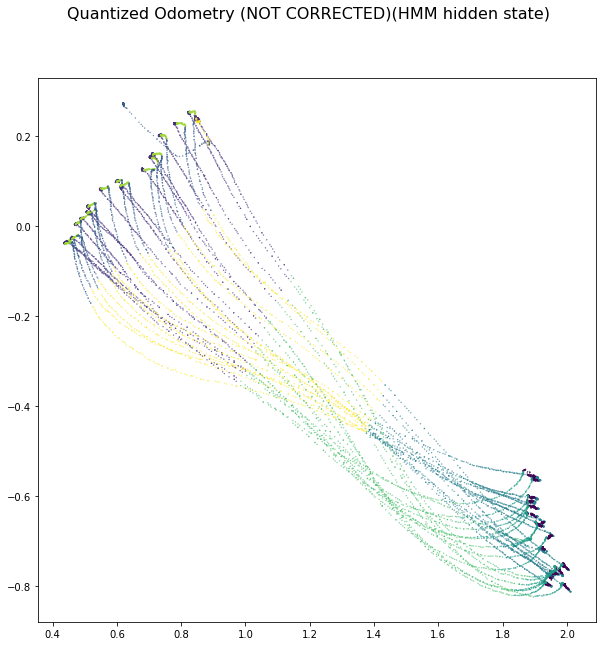

In [8]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
fig.suptitle('Quantized Odometry (NOT CORRECTED)(HMM hidden state)', fontsize=16)


ax1.scatter(x=data.x,y=data.y, s=.1, c=data.Y)

In [9]:
data[['Vk','Vk_2']]

,Vk,Vk_2
0,13,21
1,13,21
2,13,21
3,13,21
4,13,21
5,13,21
6,13,21
7,13,21
8,13,21
9,13,21


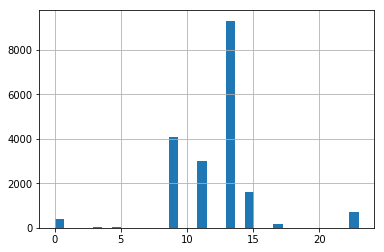

In [10]:
data.Vk.hist(bins=32)


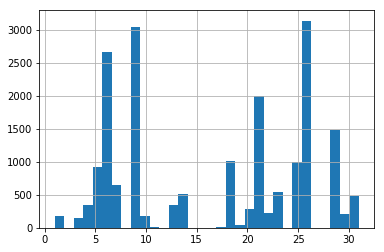

In [11]:
data.Vk_2.hist(bins=32)


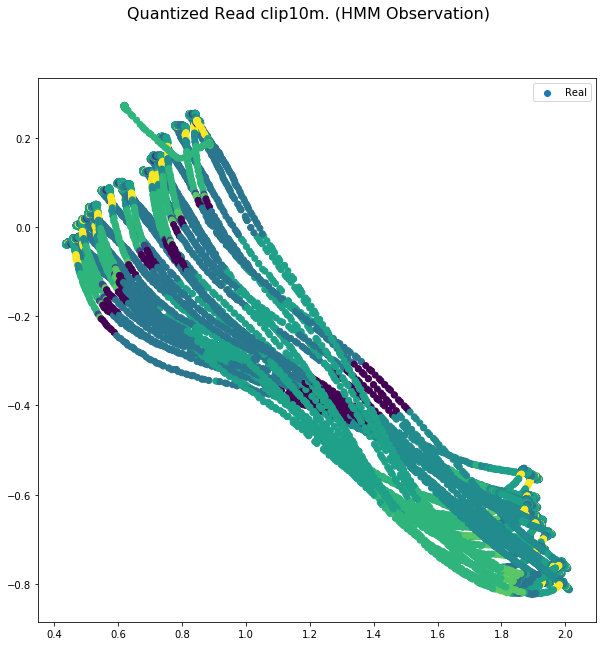

In [12]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Quantized Read clip' +(str)( clip1)+ 'm. (HMM Observation)', fontsize=16)

ax1 = fig.add_subplot(111)

ax1.scatter(x=data.x,y=data.y , c=data.Vk,label='Real')
ax1.legend()

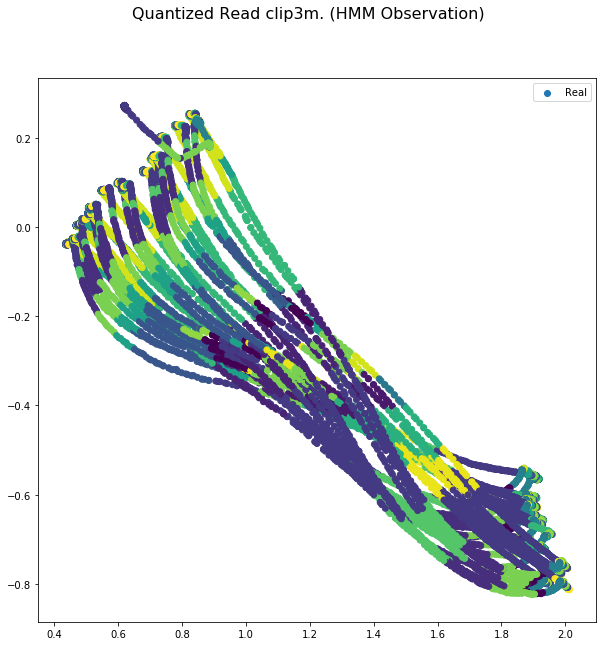

In [13]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Quantized Read clip' +(str)( clip2)+ 'm. (HMM Observation)', fontsize=16)

ax1 = fig.add_subplot(111)

ax1.scatter(x=data.x,y=data.y , c=data.Vk_2,label='Real')
ax1.legend()

In [14]:
start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


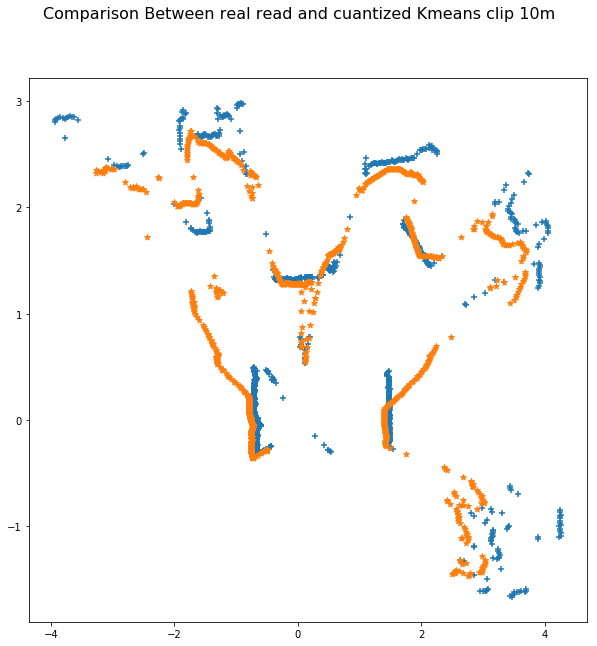

In [15]:
vec_obs=lec
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized Kmeans clip 10m', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x= CORDSVK.xx, y=CORDSVK.yy,marker='*')



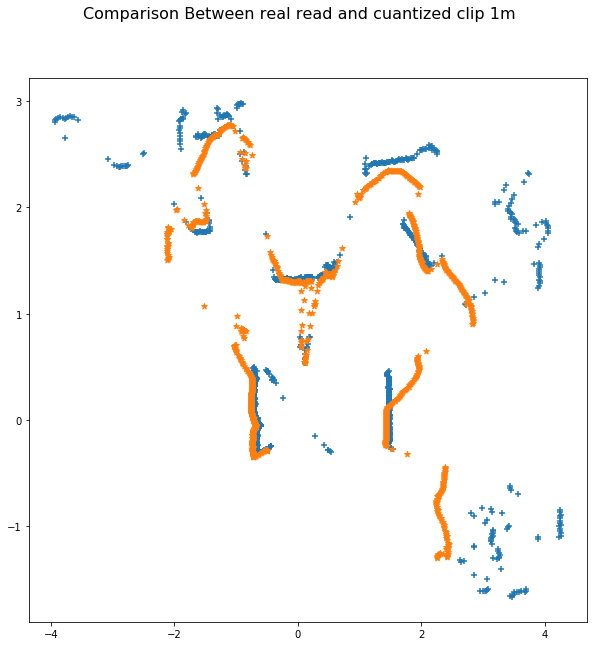

In [16]:
vec_obs=lec
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_2[np.power(lec.T-ccvk_2,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized clip 1m', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x= CORDSVK.xx, y=CORDSVK.yy,marker='*')



In [17]:
####BAUM WELCH APPROX###############???!?!?!
est,obs,obs2= data.Y.values,data.Vk.values,data.Vk_2.values

TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
EMIS2= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)



"""
#np.linalg.norm(Modelo1.A-Modelo2.A)
np.save('A.npy',Modelo1.A)
np.save('B.npy',Modelo1.B)
np.save('PI.npy',Modelo1.PI)
print("MODEL SAVED")
B.shape"""
B.shape

(8, 32)

In [18]:
def accuracy(yhat,ytrue):
    weights=[.5,.2,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy


In [19]:



buf_vit=160
for i in range(1):
    
    indice= int(np.random.rand()*(len(obs)-2*buf_vit))
    obs_windowed= obs[indice:indice+buf_vit]
   # obs_windowed_aff= obs_aff[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    #path2= viterbi(obs_windowed_aff,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
   # yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        #yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat))#, accuracy(ytrue,yhat2))

14393
0.0


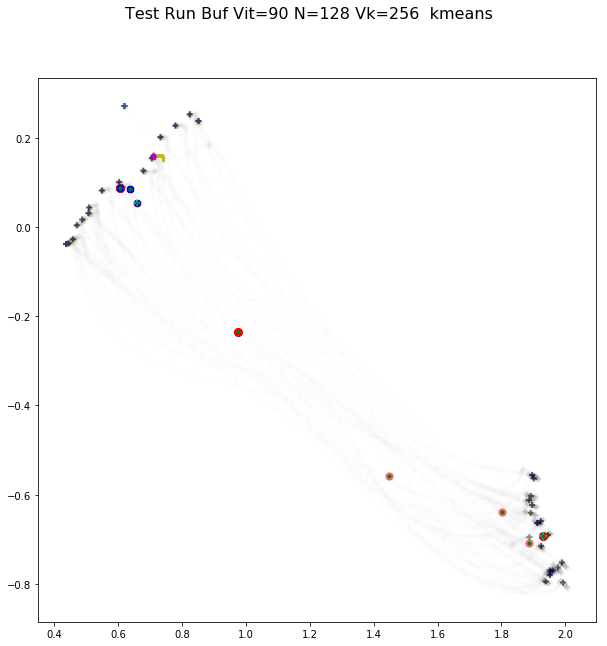

In [20]:
cc=ccxyth
paths= viterbi(obs_windowed,Modelo1,Modelo1.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=90 N=128 Vk=256  kmeans', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='c',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')

